<a href="https://colab.research.google.com/github/twlee-dev/lab/blob/main/Day02_%ED%86%B5%EA%B3%84%EC%8B%A4%EC%8A%B5_%EC%9D%B4%ED%83%9D%EC%9B%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 문제 1. 표본조사 체험하기


### 📘 문제

- 온라인 쇼핑몰은 전체 고객 수가 너무 많아, 모든 고객을 조사하기 어렵습니다.

- 그래서 무작위로 고객 30명을 뽑아 평균 만족도를 계산하고 이를 전체 만족도의 추정값으로 사용하려 합니다.

- 이번 실습에서는 직접 표본을 뽑고, 표본 평균을 구해보며,
  **“표본마다 결과가 달라질 수 있다”**는 추론 통계의 핵심 개념을 체험해봅니다.


### 📌 아래를 수행해 보세요:

- 표본을 무작위로 여러 번 뽑아 보고, 표본 평균이 어떻게 변하는지 확인해봅시다.

- 히스토그램을 그리고, 표본 평균의 분포 형태를 관찰해봅시다.


In [ ]:
# 구글 코랩 환경에서 한글 폰트 설치 및 설정하기
# 아래 코드 실행 후, [런타임] - [세션 다시 시작] 필요
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
# 파이썬 라이브러리 및 모듈 가져오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

plt.rcParams['font.family'] = 'NanumGothic'  # 기본 폰트 설정
plt.rcParams['axes.unicode_minus'] = False   # 마이너스 기호 깨짐 방지

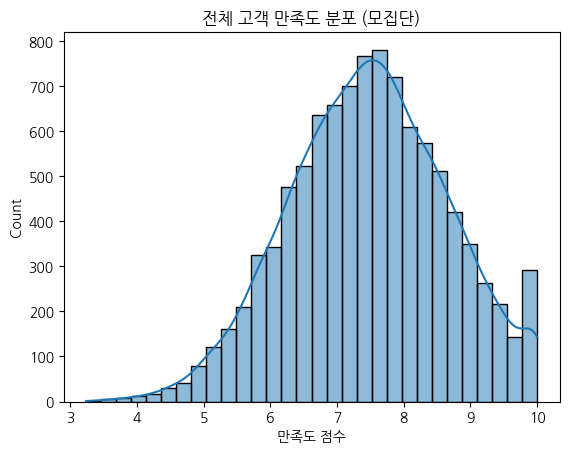

In [ ]:
# 모집단 생성 (전체 고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.5, scale=1.2, size=10000)
population = np.clip(population, 1, 10)  # 1점 ~ 10점 사이로 제한
df_pop = pd.DataFrame({'score': population})

# 전체 모집단 시각화
sns.histplot(df_pop['score'], bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [ ]:
# Q1. 모집단에서 무작위로 30명을 뽑아 표본 평균을 구해봅시다.

# 여기에 코드 작성
sample_size = 30
sample = np.random.choice(population, size=sample_size, replace=False)
sample_mean = np.mean(sample)
print(f"표본 크기 {sample_size}명의 표본 평균: {sample_mean:.2f}")

표본 크기 30명의 표본 평균: 7.20


In [ ]:
# Q2. 이 과정을 500번 반복하고, 표본 평균을 리스트에 저장합니다.

# 여기에 코드 작성
sample_means = []
num_simulations = 500
sample_size = 30 # 문제 1-Q1에서 정의된 표본 크기

for _ in range(num_simulations):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

print(f"총 {num_simulations}번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.")

총 500번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.


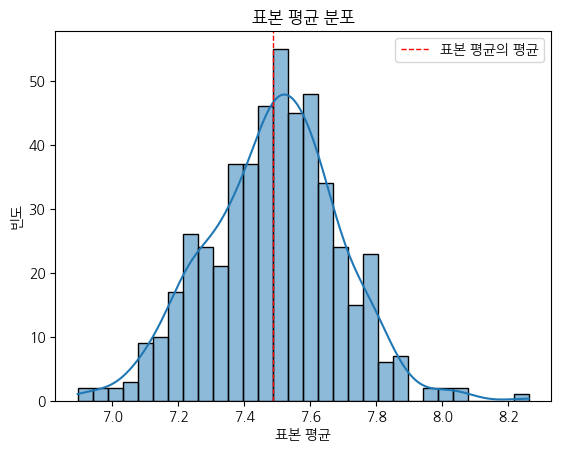

In [ ]:
# Q3. 표본 평균들의 분포를 히스토그램으로 그려봅시다. 평균선도 함께 표시해 봅시다.

# 여기에 코드 작성
sns.histplot(sample_means, bins=30, kde=True)
plt.title("표본 평균 분포")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.axvline(np.mean(sample_means), color='red', linestyle='dashed', linewidth=1, label='표본 평균의 평균')
plt.legend()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?


**🧠 데이터를 어떻게 읽을까요?**

- 표본 평균들은 어떤 값 주변에 많이 분포해 있나요? 이 값은 전체 모집단 평균과 얼마나 비슷한가요?
    - 히스토그램을 보면 표본 평균들은 약 7.5 근처에 가장 많이 분포해 있습니다. 모집단의 평균이 7.5였던 것을 고려하면, 표본 평균은 모집단 평균을 잘 추정하고 있음을 알 수 있습니다.

- 표본을 1번 뽑았을 때와 500번을 반복해서 뽑았을 때, 표본 평균의 분포나 신뢰성에는 어떤 차이가 있나요?
    - 표본을 1번 뽑았을 때는 특정 표본의 평균값 하나만 얻게 됩니다. 이 하나의 값은 모집단 평균과 차이가 있을 수 있습니다.
    - 하지만 표본을 500번 반복해서 뽑으면, 표본 평균들이 다양한 값을 가지는 분포를 형성합니다. 이 분포는 모집단 평균 주변에 집중되는 경향을 보이며, 표본 평균들의 평균은 모집단 평균에 가까워집니다. 즉, 여러 번의 시뮬레이션을 통해 표본 평균이 모집단 평균을 추정하는 신뢰성을 확인할 수 있습니다.

- 친구가 다른 표본을 뽑았다면 같은 평균이 나왔을까요? 비슷한 결과가 나왔더라도 완전히 같지 않았다면, 그 이유는 무엇일까요?
    - 무작위로 표본을 뽑았기 때문에 친구가 뽑은 표본은 제가 뽑은 표본과 구성원이 다를 수 있습니다. 따라서 다른 표본에서는 약간 다른 표본 평균이 계산될 것입니다. 이는 '표본오차' 때문이며, 표본이 모집단의 완벽한 축소판이 아니기 때문에 발생하는 자연스러운 현상입니다.

- 표본 평균들의 분포는 어떤 모양인가요? 종 모양의 정규분포처럼 보이나요? 그렇다면 왜 그렇게 되는 걸까요?
    - 네, 히스토그램을 보면 표본 평균들의 분포는 종 모양의 정규분포와 유사한 형태를 보입니다. 이는 '중심극한정리' 때문입니다. 원래 모집단의 분포 모양과 관계없이, 표본의 크기가 충분히 크다면(일반적으로 30 이상), 여러 표본에서 얻은 평균들의 분포는 정규분포에 가까워집니다.

# 문제 2. 중심극한정리


### 📘 문제

- 현실에서는 모집단의 분포가 정규분포가 아닐 수도 있습니다.

- 예를 들어, 일부 고객은 매우 높은 점수를 주고, 대부분은 낮은 점수를 주는 만족도 분포가 있을 수 있죠. (예: 지수분포)

- 이처럼 원래 분포가 비정규분포여도,
  표본을 여러 번 뽑아 평균을 계산하면, 그 평균들의 분포는 정규분포에 가까워진다는 것을
  **중심극한정리(Central Limit Theorem)**라고 합니다.

- 이번 실습에서는 다양한 크기의 표본을 뽑아 평균을 계산하고,
  그 평균들의 분포가 어떻게 변하는지를 직접 실험해 봅니다.


### 📌 아래를 수행해 보세요:

- 비대칭적인 모집단(지수분포)에서 무작위로 표본을 추출해 평균을 구해봅시다.

- 표본 크기를 바꿔가며, 표본 평균들의 분포가 어떻게 변화하는지 확인해봅시다.

- 히스토그램을 그리고, 분포의 모양을 관찰해봅시다.

- 표본 크기가 커질수록 표본 평균 분포의 모양과 **퍼진 정도(분산)**가 어떻게 변하는지 관찰해봅시다.


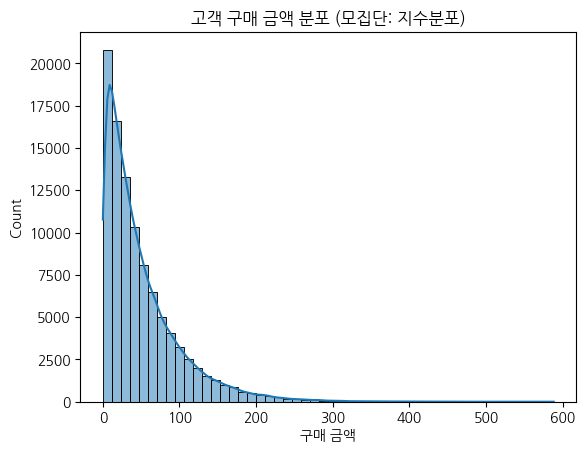

In [ ]:
# 지수분포를 따르는 모집단 생성
np.random.seed(2025)
population = np.random.exponential(scale=50, size=100000)  # 평균 50, 비대칭 분포

# 모집단 시각화
sns.histplot(population, bins=50, kde=True)
plt.title("고객 구매 금액 분포 (모집단: 지수분포)")
plt.xlabel("구매 금액")
plt.show()

In [ ]:
# Q1. 모집단에서 표본을 1000번 뽑고, 각 표본의 평균을 구해봅시다.
# 표본 크기 = 5일 때

# 여기에 코드 작성
sample_means_5 = []
num_simulations = 1000
sample_size = 5

for _ in range(num_simulations):
    sample = np.random.choice(population, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means_5.append(sample_mean)

print(f"표본 크기 {sample_size}일 때, 총 {num_simulations}번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.")

표본 크기 5일 때, 총 1000번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.


In [ ]:
# Q2. 위 과정을 표본 크기 30, 100일 때도 반복해봅시다.
# sample_size = 30, 100

# 여기에 코드 작성
sample_means_30 = []
sample_size_30 = 30

for _ in range(num_simulations):
    sample = np.random.choice(population, size=sample_size_30, replace=False)
    sample_mean = np.mean(sample)
    sample_means_30.append(sample_mean)

print(f"표본 크기 {sample_size_30}일 때, 총 {num_simulations}번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.")

sample_means_100 = []
sample_size_100 = 100

for _ in range(num_simulations):
    sample = np.random.choice(population, size=sample_size_100, replace=False)
    sample_mean = np.mean(sample)
    sample_means_100.append(sample_mean)

print(f"표본 크기 {sample_size_100}일 때, 총 {num_simulations}번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.")

표본 크기 30일 때, 총 1000번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.
표본 크기 100일 때, 총 1000번의 시뮬레이션 결과, 표본 평균 리스트가 생성되었습니다.


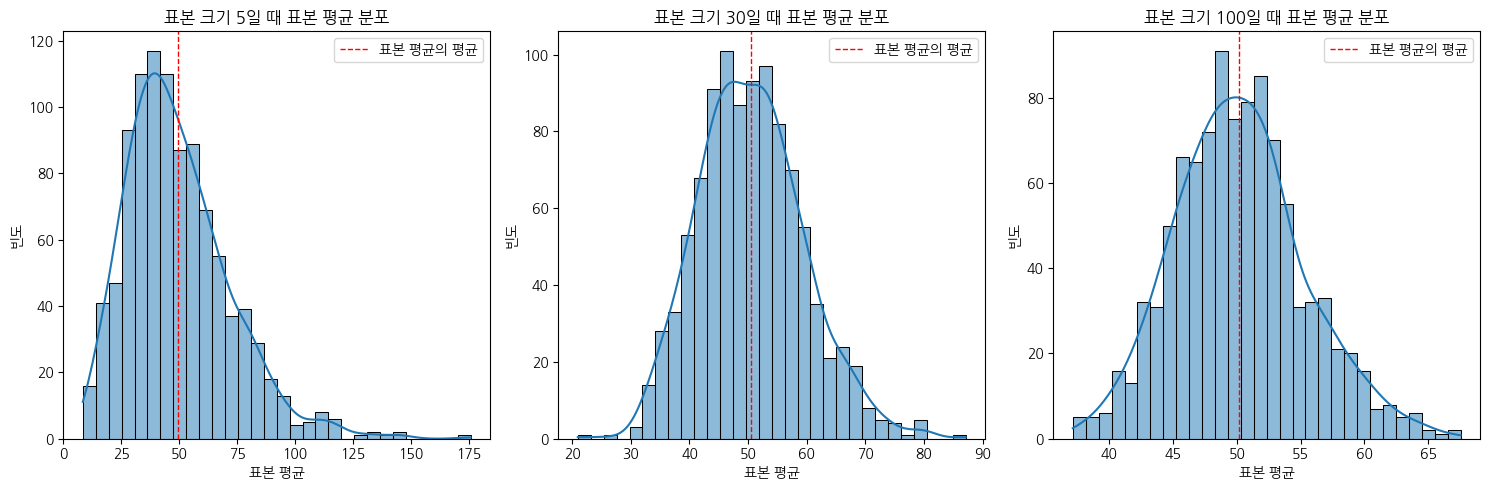

In [ ]:
# Q3. 각 표본 크기별로 표본 평균들의 분포를 히스토그램으로 그려봅시다.
# 평균선을 함께 표시해 봅시다.

# 여기에 코드 작성
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(sample_means_5, bins=30, kde=True)
plt.title(f"표본 크기 5일 때 표본 평균 분포")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.axvline(np.mean(sample_means_5), color='red', linestyle='dashed', linewidth=1, label='표본 평균의 평균')
plt.legend()

plt.subplot(1, 3, 2)
sns.histplot(sample_means_30, bins=30, kde=True)
plt.title(f"표본 크기 30일 때 표본 평균 분포")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.axvline(np.mean(sample_means_30), color='red', linestyle='dashed', linewidth=1, label='표본 평균의 평균')
plt.legend()


plt.subplot(1, 3, 3)
sns.histplot(sample_means_100, bins=30, kde=True)
plt.title(f"표본 크기 100일 때 표본 평균 분포")
plt.xlabel("표본 평균")
plt.ylabel("빈도")
plt.axvline(np.mean(sample_means_100), color='red', linestyle='dashed', linewidth=1, label='표본 평균의 평균')
plt.legend()

plt.tight_layout()
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을 때 (예: 5), 평균들의 분포는 어떤 모양인가요?

- 표본 크기가 커질수록 평균 분포의 모양은 어떤 변화를 보이나요?

- 원래 모집단은 비대칭이었는데, 왜 평균들의 분포는 정규분포처럼 바뀌었을까요?

- 이 실험을 통해 중심극한정리를 어떻게 이해하게 되었나요?

- 표본 크기에 따라 **분포의 넓이(흩어짐)**는 어떻게 달라지나요?


**🧠 데이터를 어떻게 읽을까요?**

- 표본 크기가 작을 때 (예: 5), 평균들의 분포는 어떤 모양인가요?
    - 표본 크기가 작을 때는 모집단의 비대칭적인 지수분포 형태가 어느 정도 남아있는 것을 볼 수 있습니다. 정규분포보다는 치우친 형태를 보입니다.

- 표본 크기가 커질수록 평균 분포의 모양은 어떤 변화를 보이나요?
    - 표본 크기가 커질수록 표본 평균들의 분포는 점점 더 대칭적이고 종 모양의 정규분포 형태로 수렴하는 것을 확인할 수 있습니다.

- 원래 모집단은 비대칭이었는데, 왜 평균들의 분포는 정규분포처럼 바뀌었을까요?
    - 이것이 바로 중심극한정리(Central Limit Theorem)의 핵심입니다. 모집단의 분포 형태와 상관없이, 표본의 크기가 충분히 커지면 여러 표본에서 얻은 평균들의 분포는 정규분포에 가까워집니다.

- 이 실험을 통해 중심극한정리를 어떻게 이해하게 되었나요?
    - 이 실험을 통해 모집단이 정규분포가 아니더라도, 충분히 큰 표본을 반복적으로 추출하여 얻은 표본 평균들은 정규분포를 따른다는 것을 시각적으로 확인하고 이해할 수 있게 되었습니다. 이는 통계적 추론에서 매우 중요한 기반이 됩니다.

- 표본 크기에 따라 **분포의 넓이(흩어짐)**는 어떻게 달라지나요?
    - 표본 크기가 커질수록 표본 평균들의 분포는 점점 더 좁아지는 것을 확인할 수 있습니다. 즉, 표본 평균들이 모집단 평균 주변에 더 밀집하게 분포하게 됩니다. 이는 표본 크기가 클수록 표본 평균이 모집단 평균을 더 정확하게 추정한다는 것을 의미하며, 표본오차(Standard Error)가 작아진다는 것을 시사합니다.

# 문제 3. 표본오차


### 📘 문제

- 앞선 실습에서 우리는 **표본 크기(n)가 커질수록 표본 평균들의 분포가 더 좁아진다**는 것을 확인했습니다.
- 이처럼 표본 평균들이 얼마나 흩어져 있는지(분포의 퍼진 정도)를 나타내는 값을 **표준오차(Standard Error, SE)**라고 부릅니다.
- 표준오차는 **표본 평균들의 표준편차**와 같은 의미이며, 이는 우리가 뽑은 표본 평균이 실제 모평균과 평균적으로 얼마나 떨어져 있을지를 나타내는 **'예상 오차의 크기'**입니다.

- 통계학적으로 이 표준오차는 **`SE = σ / √n`** (모집단 표준편차 / 표본 크기의 제곱근) 이라는 공식으로 계산할 수 있습니다.
- 이 공식은 **표본 크기(n)가 커질수록 표준오차(SE)가 작아진다**는 것을 명확히 보여줍니다.

- 이번 실습에서는 여러 크기의 표본을 뽑아, 시뮬레이션을 통해 얻은 **표본 평균들의 표준편차(실험값)**가 공식으로 계산한 **표준오차(이론값)**와 얼마나 일치하는지 직접 확인해봅니다.

### 📌 아래를 수행해 보세요:

- 모집단에서 여러 크기의 표본(10, 30, 100, 500)을 각각 1000번 뽑고,
  그 평균들을 구한 뒤, **표본 평균의 표준편차(=표본오차)**를 비교해봅시다.

- 이 결과를 표로 정리하고, 시각화해봅시다.


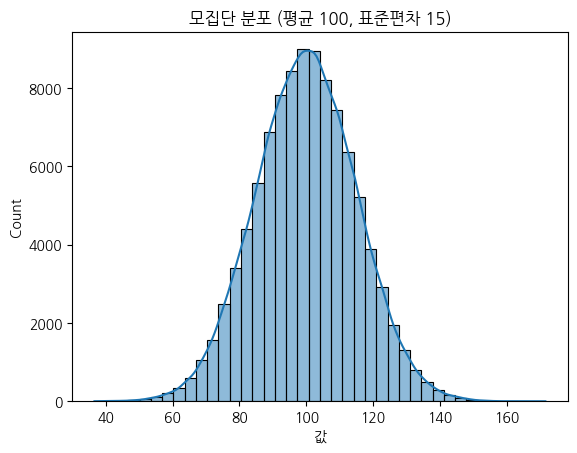

In [ ]:
# 모집단 생성 (평균 100, 표준편차 15)
np.random.seed(2025)
population = np.random.normal(loc=100, scale=15, size=100000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 100, 표준편차 15)")
plt.xlabel("값")
plt.show()

In [ ]:
# Q1. 표본 크기 10, 30, 100, 500에 대해 각각 1000번 표본을 뽑고, 평균을 구해봅시다.
# 각 표본 평균 분포의 표준편차를 계산해봅시다.
# 결과를 리스트에 저장하고, 표로 정리해봅시다.

# 여기에 코드 작성
sample_sizes = [10, 30, 100, 500]
num_simulations = 1000
sample_std_devs = []
sample_means_avg = []

for size in sample_sizes:
    sample_means = []
    for _ in range(num_simulations):
        sample = np.random.choice(population, size=size, replace=False)
        sample_mean = np.mean(sample)
        sample_means.append(sample_mean)
    sample_std_devs.append(np.std(sample_means))
    sample_means_avg.append(np.mean(sample_means))

results_df = pd.DataFrame({
    '표본 크기': sample_sizes,
    '표본 평균 분포 표준편차 (실험값)': sample_std_devs,
    '표본 평균의 평균': sample_means_avg
})

print(f"모집단 평균: {np.mean(population):.2f}")
display(results_df)

모집단 평균: 99.95


,표본 크기,표본 평균 분포 표준편차 (실험값),표본 평균의 평균
0,10,4.745235,99.911762
1,30,2.629296,99.822905
2,100,1.537213,99.980490
3,500,0.662626,99.940109


In [ ]:
# Q2. 이론적인 표준오차와 비교해봅시다.
# [공식] 표준오차(SE) = 모집단 표준편차 / √표본크기

# 여기에 코드 작성
population_std = np.std(population)
sample_sizes = results_df['표본 크기'].values  # Q1에서 사용된 표본 크기 가져오기
theoretical_std_errors = population_std / np.sqrt(sample_sizes)

results_df['이론적 표준오차'] = theoretical_std_errors

display(results_df)

,표본 크기,표본 평균 분포 표준편차 (실험값),표본 평균의 평균,이론적 표준오차
0,10,4.745235,99.911762,4.753921
1,30,2.629296,99.822905,2.744677
2,100,1.537213,99.980490,1.503322
3,500,0.662626,99.940109,0.672306


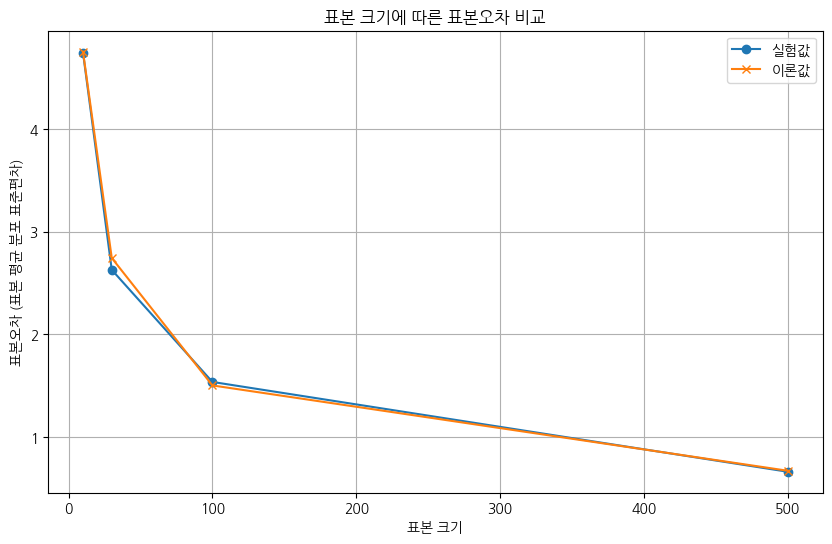

In [ ]:
# Q3. 실험값과 이론값을 시각화해봅시다.
# 표본 크기를 x축, 표준오차를 y축으로 한 꺾은선 그래프를 그려봅시다.

# 여기에 코드 작성
plt.figure(figsize=(10, 6))
plt.plot(results_df['표본 크기'], results_df['표본 평균 분포 표준편차 (실험값)'], marker='o', label='실험값')
plt.plot(results_df['표본 크기'], results_df['이론적 표준오차'], marker='x', label='이론값')
plt.title("표본 크기에 따른 표본오차 비교")
plt.xlabel("표본 크기")
plt.ylabel("표본오차 (표본 평균 분포 표준편차)")
plt.legend()
plt.grid(True)
plt.show()

### 🧠 데이터를 어떻게 읽을까요?

- 표본 크기가 작을수록, 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?

- 표본 크기가 커질수록, 평균 분포는 어떻게 변하나요?

- 실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?

- 왜 표본 크기가 커질수록 표본오차는 작아질까요?


**🧠 데이터를 어떻게 읽을까요?**

- 표본 크기가 작을수록, 표본 평균의 분포는 어떤 모양인가요? 넓게 퍼져 있나요?
  - 표본 크기가 작을수록 표본 평균들의 분포는 더 넓게 퍼져 있습니다. 이는 작은 표본으로 얻은 평균은 변동성이 크다는 것을 의미합니다.

- 표본 크기가 커질수록, 평균 분포는 어떻게 변하나요?
  - 표본 크기가 커질수록 표본 평균들의 분포는 중심(모집단 평균 근처)에 더 가깝게 모이고, 분포의 폭이 좁아집니다.

- 실험값과 이론값(공식 계산값)은 얼마나 비슷한가요?
  - 실험을 통해 얻은 표본 평균 분포의 표준편차(실험값)는 공식으로 계산한 이론적 표준오차와 매우 유사함을 그래프를 통해 확인할 수 있습니다. 시뮬레이션 횟수가 많을수록 더 가까워집니다.

- 왜 표본 크기가 커질수록 표본오차는 작아질까요?
  - 표본오차 공식 (SE = σ / √n) 에서 알 수 있듯이, 분모에 표본 크기의 제곱근(√n)이 있습니다. 따라서 표본 크기(n)가 커질수록 분모가 커지게 되고, 결과적으로 표본오차(SE)는 작아집니다. 즉, 더 큰 표본은 모집단을 더 잘 대표하는 경향이 있어서 표본 평균의 변동성이 줄어들기 때문입니다.

# 문제 4. 신뢰구간 계산과 해석


### 📘 문제

- 표본 평균은 모집단 평균을 추정하는 좋은 점 추정(Point Estimation) 값이지만, 표본오차 때문에 정확히 일치하지는 않습니다.

- 그래서 우리는 "모집단 평균이 아마 이 범위 안에 있을 것이다"라고 **구간으로 추정(Interval Estimation)**하는 것이 더 합리적입니다. 이때 사용하는 개념이 바로 **신뢰구간(Confidence Interval)**입니다.

- 신뢰구간은 표본평균 ± 오차범위 형태로 계산되며, 이 오차범위는 신뢰수준(예: 95%, 99%)과 표본오차에 의해 결정됩니다.

- 이번 실습에서는 **모집단 표준편차(σ)를 알 때(z-분포)**와 **모를 때(t-분포)**의 신뢰구간을 각각 계산해보고, 신뢰수준에 따라 구간의 폭이 어떻게 변하는지 확인해봅니다.


### 📌 아래를 수행해 보세요:

- 모집단에서 30명을 무작위로 뽑아 평균, 표준편차, 표준오차를 계산해보세요.

- 95% 신뢰구간을 z-분포와 t-분포를 각각 사용해서 계산해보세요.

- 신뢰수준을 바꿨을 때(90%, 99%) 신뢰구간이 어떻게 변하는지 확인해보세요.


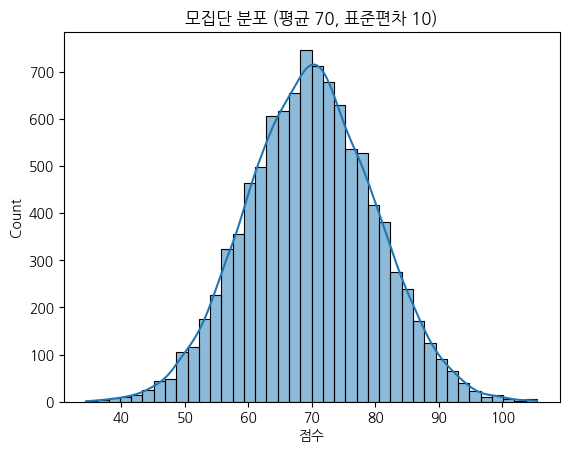

In [ ]:
# 모집단 생성
np.random.seed(2025)
population = np.random.normal(loc=70, scale=10, size=10000)

# 모집단 시각화
sns.histplot(population, bins=40, kde=True)
plt.title("모집단 분포 (평균 70, 표준편차 10)")
plt.xlabel("점수")
plt.show()

In [ ]:
# Q1. 모집단에서 표본 30명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.
# 표준오차도 함께 계산해보세요.

# 여기에 코드 작성
sample_size = 30
sample = np.random.choice(population, size=sample_size, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1) # 표본 표준편차 (n-1 자유도)

# 표준오차 (Standard Error) 계산: 표본 표준편차 / sqrt(표본 크기)
standard_error = sample_std / np.sqrt(sample_size)

print(f"표본 크기: {sample_size}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"표본오차 (SE): {standard_error:.2f}")

표본 크기: 30
표본 평균: 67.60
표본 표준편차: 11.08
표본오차 (SE): 2.02


In [ ]:
# Q2. 모집단의 표준편차를 알고 있다고 가정하고, z-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

# 여기에 코드 작성
from scipy.stats import norm

population_std = 10 # 문제 설명에서 주어진 모집단 표준편차
sample_size = 30
sample_mean = np.mean(sample) # Q1에서 계산된 표본 평균 사용

# 표준오차 (모집단 표준편차 사용)
standard_error_z = population_std / np.sqrt(sample_size)

# 95% 신뢰수준에 대한 z-값 (양측 검정)
alpha = 0.05
z_critical = norm.ppf(1 - alpha/2)

# 오차 범위 (Margin of Error)
margin_of_error_z = z_critical * standard_error_z

# 신뢰구간 계산
confidence_interval_z = (sample_mean - margin_of_error_z, sample_mean + margin_of_error_z)

print(f"모집단 표준편차를 알 때 (z-분포):")
print(f"  표준오차 (SE): {standard_error_z:.2f}")
print(f"  95% 신뢰수준 Z-값: {z_critical:.2f}")
print(f"  오차 범위: {margin_of_error_z:.2f}")
print(f"  95% 신뢰구간: ({confidence_interval_z[0]:.2f}, {confidence_interval_z[1]:.2f})")

모집단 표준편차를 알 때 (z-분포):
  표준오차 (SE): 1.83
  95% 신뢰수준 Z-값: 1.96
  오차 범위: 3.58
  95% 신뢰구간: (64.03, 71.18)


In [ ]:
# Q3. 모집단의 표준편차를 모른다고 가정하고, 표본 표준편차와 t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

# 여기에 코드 작성
from scipy.stats import t

sample_size = 30
sample_mean = np.mean(sample) # Q1에서 계산된 표본 평균 사용
sample_std = np.std(sample, ddof=1) # Q1에서 계산된 표본 표준편차 사용

# 표준오차 (표본 표준편차 사용)
standard_error_t = sample_std / np.sqrt(sample_size)

# 자유도
degrees_of_freedom = sample_size - 1

# 95% 신뢰수준에 대한 t-값 (양측 검정)
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=degrees_of_freedom)

# 오차 범위 (Margin of Error)
margin_of_error_t = t_critical * standard_error_t

# 신뢰구간 계산
confidence_interval_t = (sample_mean - margin_of_error_t, sample_mean + margin_of_error_t)

print(f"모집단 표준편차를 모를 때 (t-분포):")
print(f"  표본 표준편차: {sample_std:.2f}")
print(f"  표준오차 (SE): {standard_error_t:.2f}")
print(f"  자유도: {degrees_of_freedom}")
print(f"  95% 신뢰수준 T-값: {t_critical:.2f}")
print(f"  오차 범위: {margin_of_error_t:.2f}")
print(f"  95% 신뢰구간: ({confidence_interval_t[0]:.2f}, {confidence_interval_t[1]:.2f})")

모집단 표준편차를 모를 때 (t-분포):
  표본 표준편차: 11.08
  표준오차 (SE): 2.02
  자유도: 29
  95% 신뢰수준 T-값: 2.05
  오차 범위: 4.14
  95% 신뢰구간: (63.47, 71.74)


In [ ]:
# Q4. 신뢰수준을 90%, 99%로 바꿔가며 신뢰구간을 계산해보고, 그 폭을 비교해봅시다.

# 여기에 코드 작성
from scipy.stats import t

sample_size = 30
sample_mean = np.mean(sample) # Q1에서 계산된 표본 평균 사용
sample_std = np.std(sample, ddof=1) # Q1에서 계산된 표본 표준편차 사용
degrees_of_freedom = sample_size - 1
standard_error_t = sample_std / np.sqrt(sample_size)

confidence_levels = [0.90, 0.99]

for alpha in [1 - level for level in confidence_levels]:
    t_critical = t.ppf(1 - alpha/2, df=degrees_of_freedom)
    margin_of_error_t = t_critical * standard_error_t
    confidence_interval_t = (sample_mean - margin_of_error_t, sample_mean + margin_of_error_t)
    interval_width = confidence_interval_t[1] - confidence_interval_t[0]

    print(f"신뢰수준: {((1-alpha)*100):.0f}%")
    print(f"  T-값: {t_critical:.2f}")
    print(f"  오차 범위: {margin_of_error_t:.2f}")
    print(f"  신뢰구간: ({confidence_interval_t[0]:.2f}, {confidence_interval_t[1]:.2f})")
    print(f"  신뢰구간 폭: {interval_width:.2f}\n")

신뢰수준: 90%
  T-값: 1.70
  오차 범위: 3.44
  신뢰구간: (64.17, 71.04)
  신뢰구간 폭: 6.87

신뢰수준: 99%
  T-값: 2.76
  오차 범위: 5.57
  신뢰구간: (62.03, 73.18)
  신뢰구간 폭: 11.15



### 🧠 데이터를 어떻게 읽을까요?

- z-분포와 t-분포를 사용한 신뢰구간은 얼마나 차이가 있나요?

- 신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?

- 신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?

- 이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?


**🧠 데이터를 어떻게 읽을까요?**

- z-분포와 t-분포를 사용한 신뢰구간은 얼마나 차이가 있나요?
  - 일반적으로 표본 크기가 작을수록 z-분포와 t-분포를 사용한 신뢰구간에 차이가 있습니다. t-분포는 표본 표준편차를 사용하기 때문에 불확실성이 더 커서 z-분포를 사용할 때보다 신뢰구간이 더 넓게 계산되는 경향이 있습니다. 표본 크기가 커질수록 t-분포는 z-분포에 가까워져 차이가 줄어듭니다.

- 신뢰수준이 높아질수록 신뢰구간의 폭은 어떻게 변하나요? 왜 그럴까요?
  - 신뢰수준이 높아질수록 신뢰구간의 폭은 넓어집니다. 이는 모집단 평균이 해당 구간 안에 포함될 확률을 높이기 위해 더 넓은 범위를 제시해야 하기 때문입니다. 더 높은 확신을 가지려면 더 넓은 범위가 필요합니다.

- 신뢰구간이 넓다는 건 좋은 걸까요? 나쁜 걸까요?
  - 신뢰구간이 넓다는 것은 추정의 정밀도가 낮다는 것을 의미합니다. 즉, 표본으로 얻은 정보가 모집단 평균에 대해 좁은 범위로 확신 있게 말하기 어렵다는 뜻입니다. 통계적으로는 추정의 정밀도가 낮다는 점에서 '나쁘다'고 볼 수 있지만, 이는 표본 크기가 작거나 데이터의 변동성이 클 때 발생하는 자연스러운 결과일 수 있습니다.

- 이 데이터가 실제 고객 만족도라면, 신뢰구간 정보를 마케팅 전략에 어떻게 활용할 수 있을까요?
  - 신뢰구간은 전체 고객의 평균 만족도가 실제로 어느 범위에 있을지를 알려줍니다. 예를 들어, 95% 신뢰구간이 (6.5, 7.5)로 나왔다면, 전체 고객 만족도 평균이 6.5점과 7.5점 사이에 있을 것이라고 95% 확신할 수 있습니다. 마케팅 팀은 이 정보를 바탕으로 현재 고객 만족도 수준을 판단하고, 목표 만족도 설정, 개선 필요한 영역 파악, 마케팅 캠페인의 효과 측정 등에 활용할 수 있습니다. 만약 신뢰구간의 하한값이 마케팅 목표치보다 낮다면 만족도 개선 전략이 필요하다고 판단할 수 있습니다.

# 문제 5. 미니 프로젝트 - 고객 만족도 신뢰구간 추정


### 📘 문제

- 전체 고객 10,000명을 대상으로 만족도 조사를 하는 것은 시간과 비용이 많이 듭니다.
- 그래서 우리는 무작위로 일부 고객만 조사하여, 전체 고객의 평균 만족도를 추정하려 합니다.

- 이 프로젝트에서는 실제와 같은 상황을 가정하여, 표본을 뽑고 신뢰구간을 계산한 뒤, 이 결과를 바탕으로 마케팅 전략에 어떻게 활용할 수 있을지까지 생각해보는 실습을 진행합니다.


### 📌 아래를 수행해 보세요:

- 모집단을 생성하고, 거기서 표본을 40명 뽑아 평균을 계산해봅시다.

- 표본 평균과 표준편차를 바탕으로 95% 신뢰구간을 계산해봅시다.

- 히스토그램을 그리고 신뢰구간을 시각화해봅시다.

- 이 결과를 어떻게 해석하고, 마케팅 전략에 활용할 수 있을지 생각해봅시다.


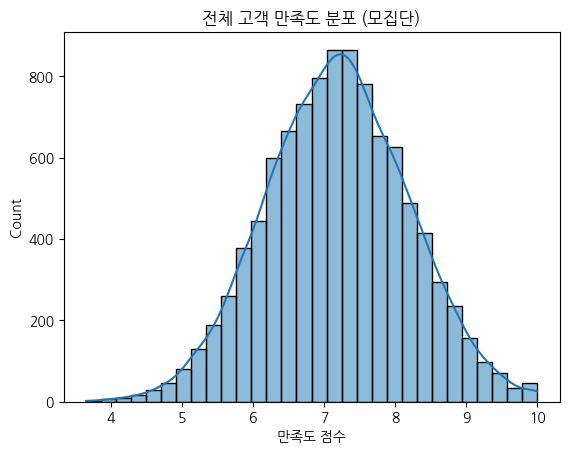

In [ ]:
# 모집단 생성 (고객 만족도 10,000명)
np.random.seed(2025)
population = np.random.normal(loc=7.2, scale=1.0, size=10000)
population = np.clip(population, 1, 10)

# 모집단 시각화
sns.histplot(population, bins=30, kde=True)
plt.title("전체 고객 만족도 분포 (모집단)")
plt.xlabel("만족도 점수")
plt.show()

In [ ]:
# Q1. 모집단에서 표본 40명을 무작위로 추출하고, 표본 평균과 표준편차를 구해봅시다.

# 여기에 코드 작성
sample_size = 40
sample = np.random.choice(population, size=sample_size, replace=False)

sample_mean = np.mean(sample)
sample_std = np.std(sample, ddof=1) # 표본 표준편차 (n-1 자유도)

print(f"표본 크기: {sample_size}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")

표본 크기: 40
표본 평균: 7.14
표본 표준편차: 1.10


In [ ]:
# Q2. 표준오차(SE)를 구하고, t-분포를 사용하여 95% 신뢰구간을 계산해봅시다.

# 여기에 코드 작성
from scipy.stats import t

# Q1에서 계산된 표본 통계량 사용
# sample_size = 40
# sample_mean = np.mean(sample)
# sample_std = np.std(sample, ddof=1)

# 표준오차 (Standard Error) 계산: 표본 표준편차 / sqrt(표본 크기)
standard_error = sample_std / np.sqrt(sample_size)

# 자유도
degrees_of_freedom = sample_size - 1

# 95% 신뢰수준에 대한 t-값 (양측 검정)
alpha = 0.05
t_critical = t.ppf(1 - alpha/2, df=degrees_of_freedom)

# 오차 범위 (Margin of Error)
margin_of_error = t_critical * standard_error

# 신뢰구간 계산
confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)

print(f"표본 크기: {sample_size}")
print(f"표본 평균: {sample_mean:.2f}")
print(f"표본 표준편차: {sample_std:.2f}")
print(f"표준오차 (SE): {standard_error:.2f}")
print(f"자유도: {degrees_of_freedom}")
print(f"95% 신뢰수준 T-값: {t_critical:.2f}")
print(f"오차 범위: {margin_of_error:.2f}")
print(f"95% 신뢰구간: ({confidence_interval[0]:.2f}, {confidence_interval[1]:.2f})")

표본 크기: 40
표본 평균: 7.14
표본 표준편차: 1.10
표준오차 (SE): 0.17
자유도: 39
95% 신뢰수준 T-값: 2.02
오차 범위: 0.35
95% 신뢰구간: (6.79, 7.50)


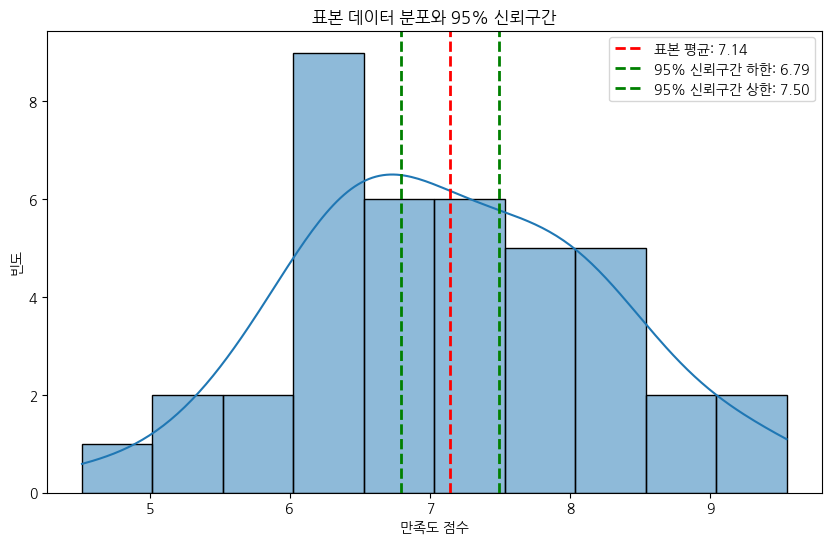

In [ ]:
# Q3. 표본 데이터의 히스토그램을 그리고, 평균 및 신뢰구간을 함께 시각화해봅시다.

# 여기에 코드 작성
plt.figure(figsize=(10, 6))
sns.histplot(sample, bins=10, kde=True)
plt.title("표본 데이터 분포와 95% 신뢰구간")
plt.xlabel("만족도 점수")
plt.ylabel("빈도")

# 표본 평균 표시
plt.axvline(sample_mean, color='red', linestyle='dashed', linewidth=2, label=f'표본 평균: {sample_mean:.2f}')

# 95% 신뢰구간 표시
plt.axvline(confidence_interval[0], color='green', linestyle='dashed', linewidth=2, label=f'95% 신뢰구간 하한: {confidence_interval[0]:.2f}')
plt.axvline(confidence_interval[1], color='green', linestyle='dashed', linewidth=2, label=f'95% 신뢰구간 상한: {confidence_interval[1]:.2f}')

plt.legend()
plt.show()

In [ ]:
# Q4. 신뢰구간의 결과에 따라 어떤 구체적인 마케팅 전략을 세울 수 있을까요?

**Q4. 신뢰구간의 결과에 따라 어떤 구체적인 마케팅 전략을 세울 수 있을까요?**

고객 만족도 95% 신뢰구간이 (6.79, 7.50)으로 계산되었습니다. 이는 전체 고객 만족도의 평균이 95%의 확률로 이 구간 안에 있을 것이라고 추정할 수 있음을 의미합니다.

이 결과를 바탕으로 다음과 같은 마케팅 전략을 고려해 볼 수 있습니다.

1.  **현재 만족도 수준 판단 및 목표 설정:**
    *   평균 만족도 추정치(7.14)와 신뢰구간 (6.79, 7.50)을 통해 현재 고객 만족도가 10점 만점에 약 7점대 수준임을 파악할 수 있습니다.
    *   만약 마케팅 목표 만족도 점수가 8점 이상이라면, 현재 만족도 수준이 목표에 미치지 못함을 알 수 있으며, 만족도 향상을 위한 구체적인 전략 수립이 필요합니다.
    *   반대로 목표 만족도 점수가 7점 이하라면, 현재 만족도 수준이 목표를 달성했거나 초과했음을 확인하고 유지 전략을 세울 수 있습니다.

2.  **개선 영역 파악:**
    *   전체 만족도 평균만으로는 부족할 수 있습니다. 만족도 조사 시, 서비스 품질, 제품 만족도, 배송, CS 응대 등 세부 항목별 만족도와 신뢰구간을 함께 분석하여 어떤 영역이 강점이고 어떤 영역이 개선 필요한 약점인지 파악해야 합니다. 예를 들어, 배송 만족도의 신뢰구간 하한값이 낮다면 배송 시스템 개선에 집중해야 합니다.

3.  **마케팅 메시지 조정:**
    *   만약 만족도 수준이 경쟁사 대비 높거나 목표치를 달성했다면, 이를 마케팅 메시지에 적극적으로 활용하여 "높은 고객 만족도"를 강조할 수 있습니다.
    *   만족도 수준이 기대보다 낮다면, 만족도 개선을 위한 노력을 강조하고 실제 개선 사례를 공유하는 메시지를 전달할 수 있습니다.

4.  **벤치마킹:**
    *   산업 평균 만족도나 경쟁사 만족도 데이터가 있다면, 우리 쇼핑몰의 신뢰구간과 비교하여 상대적인 위치를 파악하고 경쟁 우위를 확보하거나 격차를 줄이기 위한 전략을 세울 수 있습니다.

5.  **모니터링 및 재조사 계획:**
    *   한 번의 조사로 얻은 신뢰구간은 특정 시점의 추정치입니다. 마케팅 전략 실행 후 만족도 변화를 지속적으로 모니터링하고, 주기적으로 다시 표본 조사를 수행하여 신뢰구간의 변화를 확인함으로써 전략의 효과를 측정하고 필요에 따라 조정해야 합니다.

6.  **표본 크기 및 신뢰수준 고려:**
    *   만약 신뢰구간의 폭이 너무 넓어 만족도 수준을 판단하기 어렵다면, 표본 크기를 늘리거나 (예: 40명에서 100명 이상으로) 신뢰수준을 약간 낮추는 것을 고려해 볼 수 있습니다. 다만 신뢰수준을 낮추는 것은 추정의 확실성을 떨어뜨리므로 신중해야 합니다.

### 🧠 데이터를 어떻게 읽을까요?

- 신뢰구간은 몇 점에서 몇 점 사이인가요?

- 이 구간은 전체 모집단 평균을 포함하고 있나요?

- 이 결과를 바탕으로 고객 만족도가 충분히 높다고 말할 수 있을까요?

- 만약 신뢰구간이 너무 넓게 나왔다면, 그 이유는 무엇이고 어떻게 개선할 수 있을까요?


**🧠 데이터를 어떻게 읽을까요?**

- 신뢰구간은 몇 점에서 몇 점 사이인가요?
  - 95% 신뢰구간은 약 6.79점에서 7.50점 사이입니다. (실행 결과에 따라 소수점 값은 달라질 수 있습니다.)

- 이 구간은 전체 모집단 평균을 포함하고 있나요?
  - 이 특정 신뢰구간이 모집단 평균을 포함하는지 100% 확신할 수는 없습니다. 신뢰구간의 의미는 동일한 방법으로 100번 신뢰구간을 계산했을 때, 그 중 95번은 모집단 평균을 포함할 것이라는 뜻입니다. 이 실험에서 사용된 모집단 평균은 7.2였으며, 계산된 신뢰구간 (6.79, 7.50)은 7.2를 포함하고 있습니다. 하지만 다른 표본을 뽑았다면 다른 신뢰구간이 계산되었을 것이고, 그 신뢰구간은 모집단 평균을 포함하지 않을 수도 있습니다.

- 이 결과를 바탕으로 고객 만족도가 충분히 높다고 말할 수 있을까요?
  - '충분히 높다'는 기준은 주관적이며 비즈니스 목표에 따라 다릅니다. 신뢰구간 (6.79, 7.50)을 보면, 전체 고객 만족도 평균이 최소 6.79점 이상일 것이라고 95% 확신할 수 있습니다. 만약 비즈니스 목표가 평균 만족도 7점 이상이라면, 신뢰구간이 7점을 포함하고 있으므로 목표 달성 가능성이 있다고 판단할 수 있습니다. 하지만 목표가 8점 이상이라면 현재 만족도 수준이 목표에 미치지 못한다고 판단할 수 있습니다. 따라서 만족도가 '충분히 높다'고 판단하기 위해서는 명확한 비즈니스 목표나 기준이 필요합니다.

- 만약 신뢰구간이 너무 넓게 나왔다면, 그 이유는 무엇이고 어떻게 개선할 수 있을까요?
  - 신뢰구간이 넓게 나오는 주요 이유는 다음과 같습니다.
    - **표본 크기가 작을 때:** 표본 크기가 작으면 표본 오차가 커져 신뢰구간이 넓어집니다.
    - **모집단의 변동성(표준편차)이 클 때:** 데이터 자체가 많이 흩어져 있으면 표본 평균의 변동성도 커져 신뢰구간이 넓어집니다.
  - 신뢰구간을 좁혀 추정의 정밀도를 높이려면 다음과 같은 방법을 고려할 수 있습니다.
    - **표본 크기 늘리기:** 가장 효과적인 방법입니다. 표본 크기를 늘리면 표본 오차가 줄어들어 신뢰구간이 좁아집니다.
    - **신뢰수준 낮추기:** 신뢰수준을 낮추면 (예: 95%에서 90%) 신뢰구간의 폭이 좁아지지만, 추정의 확실성이 떨어지므로 신중해야 합니다.
    - **데이터 수집 방법 개선:** 모집단의 변동성을 줄일 수 있는 방법이 있다면 고려해 볼 수 있습니다 (예: 더 동질적인 그룹을 대상으로 조사).

## 학습 내용 이론 정리 및 용어 설명

이 노트북에서는 표본 조사의 기본 원리, 중심극한정리, 표본오차의 개념, 그리고 신뢰구간 계산 및 해석 방법에 대해 학습했습니다. 주요 개념과 혼동하기 쉬운 용어들은 다음과 같습니다.

**핵심 이론:**

1.  **표본 조사:** 전체 모집단을 모두 조사하기 어려울 때, 모집단을 대표할 수 있는 일부(표본)를 추출하여 조사하고, 그 결과를 바탕으로 모집단의 특성을 추론하는 방법입니다.
2.  **표본 평균:** 표본으로 추출된 데이터들의 평균값입니다. 이는 모집단 평균을 추정하는 데 사용됩니다.
3.  **표본 분포:** 특정 통계량(예: 표본 평균)이 여러 번의 표본 추출을 통해 얻어졌을 때, 그 통계량들이 이루는 분포를 의미합니다.
4.  **중심극한정리(Central Limit Theorem, CLT):** 모집단의 분포 형태와 상관없이, 표본의 크기가 충분히 크다면(일반적으로 30 이상), 여러 표본에서 얻은 표본 평균들의 분포는 정규분포에 가까워진다는 정리입니다. 이 정리는 통계적 추론의 근간이 됩니다.
5.  **표본오차(Standard Error, SE):** 표본 평균들의 분포의 표준편차를 의미합니다. 즉, 표본 평균이 모집단 평균으로부터 평균적으로 얼마나 떨어져 있는지를 나타내는 지표입니다. 표본 크기가 커질수록 표본오차는 작아집니다 (SE = σ / √n 또는 s / √n).
6.  **신뢰구간(Confidence Interval, CI):** 표본 통계량을 바탕으로 모집단 모수(예: 모집단 평균)가 존재할 것으로 예상되는 구간을 일정 수준의 신뢰도로 제시하는 것입니다. 보통 "95% 신뢰구간"과 같이 사용되며, 이는 동일한 방법으로 100번 신뢰구간을 계산했을 때, 그 중 95번은 실제 모집단 모수를 포함할 것이라는 의미입니다.
7.  **신뢰수준(Confidence Level):** 신뢰구간이 실제 모집단 모수를 포함할 확률을 의미합니다 (예: 95%). 신뢰수준이 높을수록 신뢰구간의 폭은 넓어집니다.

**혼동하기 쉬운 용어:**

*   **표본오차(Standard Error, SE):** **표본 평균들이 흩어진 정도**를 나타내는 지표입니다. 즉, 표본 평균 분포의 표준편차입니다. 표본 **하나**의 오차가 아니라, 여러 표본을 반복적으로 뽑았을 때 **표본 평균들이** 얼마나 변동하는지를 나타냅니다.
*   **표본 표준편차(Sample Standard Deviation, s):** **하나의 표본 데이터들 안에서 데이터들이 흩어진 정도**를 나타내는 지표입니다. 표본 그 자체의 산포도를 의미합니다.
*   **표본 평균(Sample Mean):** **하나의 표본**에 속한 데이터들의 평균값입니다.
*   **표본 평균들의 평균(Mean of Sample Means):** 여러 번의 표본 추출을 통해 얻은 **여러 개의 표본 평균들을 다시 평균** 낸 값입니다. 중심극한정리에 따라, 이 값은 모집단 평균(μ)에 가까워집니다.

**요약:**

표본을 통해 모집단을 추정할 때는 필연적으로 오차가 발생합니다. 중심극한정리는 표본 평균의 분포가 정규분포를 따른다는 것을 알려주며, 표본오차는 그 분포의 흩어짐 정도를 나타냅니다. 신뢰구간은 표본오차를 고려하여 모집단 모수가 있을 범위를 확률적으로 제시함으로써, 점 추정의 한계를 보완해 줍니다. 표본 크기가 커질수록 표본오차가 줄어들어 신뢰구간이 좁아지고, 추정의 정밀도가 높아집니다.